In [1]:
import os
from pathlib import Path
container_check = os.getenv("iscontainer")
if container_check=="y":
    config_dir = Path("/home/vscode/.config/kaggle")
    config_dir.mkdir(parents=True, exist_ok=True)

    with open(config_dir / "kaggle.json", "w") as dst:
        with open("../kaggle.json", "r") as src:
            dst.write(src.read())

In [2]:
import os
import sys

sys.path.append(os.path.abspath(".."))

from ARISA_DSML.config import RAW_DATA_DIR, target
from ARISA_DSML.preproc import get_raw_data

2025-05-04 17:53:54.764 | INFO     | ARISA_DSML.config:<module>:12 - PROJ_ROOT path is: C:\Users\Wojciech\Documents\WWSI\ARISA-MLOps-Assignment


In [3]:
from ARISA_DSML.helpers import get_active_branch_name, get_git_commit_hash

get_active_branch_name("..")  # need ".." because we are not in root
get_git_commit_hash()

'e748c36602acdadf8aabf93c0665ca75544e43b9'

In [4]:
get_raw_data()
!dir "{RAW_DATA_DIR}"

2025-05-04 17:53:59.449 | INFO     | ARISA_DSML.preproc:get_raw_data:21 - Downloading dataset mexwell/heart-disease-dataset to C:\Users\Wojciech\Documents\WWSI\ARISA-MLOps-Assignment\data\raw


Dataset URL: https://www.kaggle.com/datasets/mexwell/heart-disease-dataset


2025-05-04 17:54:00.503 | INFO     | ARISA_DSML.preproc:get_raw_data:24 - Download complete.


 Volume in drive C has no label.
 Volume Serial Number is D0EF-588E

 Directory of C:\Users\Wojciech\Documents\WWSI\ARISA-MLOps-Assignment\data\raw

04.05.2025  17:54    <DIR>          .
04.05.2025  17:54    <DIR>          ..
04.05.2025  17:33                 0 .gitkeep
04.05.2025  17:54           420�674 documentation.pdf
04.05.2025  17:54            39�689 heart_statlog_cleveland_hungary_final.csv
               3 File(s)        460�363 bytes
               2 Dir(s)  110�463�250�432 bytes free


In [5]:
from ARISA_DSML.preproc import preprocess_df

train_path, test_path = preprocess_df(RAW_DATA_DIR / "heart_statlog_cleveland_hungary_final.csv")

2025-05-04 17:54:02.728 | INFO     | ARISA_DSML.preproc:preprocess_df:58 - Train saved to C:\Users\Wojciech\Documents\WWSI\ARISA-MLOps-Assignment\data\processed\train.csv, Test saved to C:\Users\Wojciech\Documents\WWSI\ARISA-MLOps-Assignment\data\processed\test.csv


In [6]:
import pandas as pd
df_train = pd.read_csv(train_path)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  734 non-null    int64  
 1   sex                  734 non-null    int64  
 2   chest_pain_type      734 non-null    int64  
 3   resting_bp_s         734 non-null    int64  
 4   cholesterol          734 non-null    int64  
 5   fasting_blood_sugar  734 non-null    int64  
 6   resting_ecg          734 non-null    int64  
 7   max_heart_rate       734 non-null    int64  
 8   exercise_angina      734 non-null    int64  
 9   oldpeak              734 non-null    float64
 10  st_slope             734 non-null    int64  
 11  target               734 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 68.9 KB


In [7]:
y_train = df_train.pop(target)
X_train = df_train

In [8]:
import mlflow
from ARISA_DSML.train import run_hyperopt, get_or_create_experiment

mlflow.set_tracking_uri(f"http://127.0.0.1:5000")

experiment_id = get_or_create_experiment("heart_hyperparam_tuning")
mlflow.set_experiment(experiment_id=experiment_id)
best_params_path = run_hyperopt(X_train, y_train)

c:\Users\Wojciech\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\protos\service_pb2.py:11: UserWarning: google.protobuf.service module is deprecated. RPC implementations should provide code generator plugins which generate code specific to the RPC implementation. service.py will be removed in Jan 2025
  from google.protobuf import service as _service
2025-05-04 17:56:37.983 | INFO     | ARISA_DSML.train:run_hyperopt:70 - Best Parameters: {'depth': 6, 'learning_rate': 0.2997467303248517, 'iterations': 258, 'l2_leaf_reg': 29.31565918827504, 'bagging_temperature': 0.5200854166591251, 'random_strength': 0.0057443330613406365}


In [9]:
import joblib
from ARISA_DSML.train import train_cv
params = joblib.load(best_params_path)
n_folds = 5
cv_output_path = train_cv(X_train, y_train, params, n=n_folds)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]
0:	learn: 0.8792846	test: 0.9047619	best: 0.9047619 (0)	total: 149ms	remaining: 38.3s
1:	learn: 0.8804841	test: 0.8888889	best: 0.9047619 (0)	total: 153ms	remaining: 19.5s
2:	learn: 0.8919330	test: 0.8902439	best: 0.9047619 (0)	total: 154ms	remaining: 13.1s
3:	learn: 0.8933539	test: 0.9079755	best: 0.9079755 (3)	total: 155ms	remaining: 9.85s
4:	learn: 0.9074355	test: 0.9012346	best: 0.9079755 (3)	total: 156ms	remaining: 7.91s
5:	learn: 0.9065850	test: 0.9012346	best: 0.9079755 (3)	total: 158ms	remaining: 6.62s
6:	learn: 0.9040248	test: 0.9000000	best: 0.9079755 (3)	total: 159ms	remaining: 5.69s
7:	learn: 0.9133127	test: 0.9012346	best: 0.9079755 (3)	total: 160ms	remaining: 5s
8:	learn: 0.9164087	test: 0.9192547	best: 0.9192547 (8)	total: 161ms	remaining: 4.46s
9:	learn: 0.9214176	test: 0.9125000	best: 0.9192547 (8)	total: 162ms	remaining: 4.03s
10:	learn: 0.9180835	test: 0.8944099	best: 0.9192547 (8)	total: 164ms	remaining: 3.67s
11:	learn: 0.9169231	test: 0.9068

In [10]:
from ARISA_DSML.train import plot_error_scatter
cv_results = pd.read_csv(cv_output_path)
plot_error_scatter(
    df_plot=cv_results, 
    name="Mean F1 Score", 
    title="Cross-Validation (N=5) Mean F1 score with Error Bands",
    xtitle="Training Steps",
    ytitle="Performance Score",
    yaxis_range=[0.5, 1]
)

In [11]:
plot_error_scatter(
    cv_results,
    x="iterations",
    y="test-Logloss-mean",
    err="test-Logloss-std",
    name="Mean logloss",
    title="Cross-Validation (N=5) Mean Logloss with Error Bands",
    xtitle="Training Steps",
    ytitle="Logloss",
)

In [12]:
from ARISA_DSML.train import train
params = joblib.load(best_params_path)
experiment_id = get_or_create_experiment("heart_full_training")
mlflow.set_experiment(experiment_id=experiment_id)
cv_results = pd.read_csv(cv_output_path)
model_path, model_params_path = train(X_train, y_train, params, cv_results=cv_results)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.5199944	total: 1.37ms	remaining: 353ms
50:	learn: 0.1805511	total: 68ms	remaining: 276ms
100:	learn: 0.1305037	total: 123ms	remaining: 191ms
150:	learn: 0.0889627	total: 178ms	remaining: 126ms
200:	learn: 0.0715030	total: 232ms	remaining: 65.9ms
250:	learn: 0.0568648	total: 288ms	remaining: 8.03ms
257:	learn: 0.0563161	total: 295ms	remaining: 0us


c:\Users\Wojciech\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:394: UserWarning:

Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.

Successfully registered model 'heart-disease-bclass'.
2025/05/04 17:59:24 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: heart-disease-bclass, versio

In [13]:
df_test = pd.read_csv(test_path)

df_test.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
0,63,0,2,140,195,0,0,179,0,0.0,1,0
1,53,1,3,145,518,0,0,130,0,0.0,2,1
2,65,1,4,160,0,1,1,122,0,1.2,2,1
3,56,1,4,130,0,0,2,122,1,1.0,2,1
4,54,1,2,108,309,0,0,156,0,0.0,1,0


In [14]:
y_test = df_test.pop(target)
X_test = df_test

C:\Users\Wojciech\AppData\Local\Temp\ipykernel_27212\1031401682.py:6: FutureWarning:

``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.12.1/model-registry.html#migrating-from-stages

C:\Users\Wojciech\AppData\Local\Temp\ipykernel_27212\1031401682.py:14: FutureWarning:

``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.12.1/model-registry.html#migrating-from-stages



2025/05/04 18:01:25 INFO mlflow.store.artifact.artifact_repo: The progress bar can be disabled by setting the environment variable MLFLOW_ENABLE_ARTIFACTS_PROGRESS_BAR to false


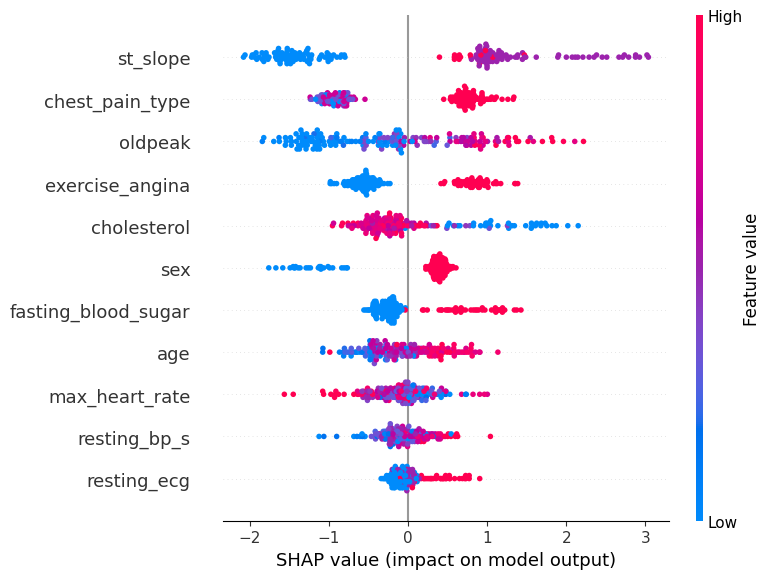

In [15]:
import json
from ARISA_DSML.predict import predict
from mlflow.client import MlflowClient

client = MlflowClient(mlflow.get_tracking_uri())
model_info = client.get_latest_versions('heart-disease-bclass')[0]

# extract params/metrics data for run `test_run_id` in a single dict
run_data_dict = client.get_run(model_info.run_id).data.to_dictionary()
run = client.get_run(model_info.run_id)
log_model_meta = json.loads(run.data.tags['mlflow.log-model.history'])
log_model_meta[0]['signature']

latest_model = client.get_latest_versions('heart-disease-bclass')

_, artifact_folder = os.path.split(latest_model[0].source)
model_uri = "runs:/{}/{}".format(latest_model[0].run_id, artifact_folder)
loaded_model = mlflow.catboost.load_model(model_uri)

params = run_data_dict["params"]
params["feature_columns"] = [inp["name"] for inp in json.loads(log_model_meta[0]['signature']['inputs'])]
preds_path = predict(loaded_model, df_test, params)

In [16]:
from ARISA_DSML.resolve import get_model_by_alias
client = MlflowClient(mlflow.get_tracking_uri())
champ_mv = get_model_by_alias(client)
chall_mv = get_model_by_alias(client, alias="challenger")

No champion model, predicting using newest model
runs:/7ce0a4dfc80d4b1a9efac94a4bfc2cd7/model


C:\Users\Wojciech\AppData\Local\Temp\ipykernel_27212\2109093237.py:6: FutureWarning:

``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.12.1/model-registry.html#migrating-from-stages



2025/05/04 18:01:48 INFO mlflow.store.artifact.artifact_repo: The progress bar can be disabled by setting the environment variable MLFLOW_ENABLE_ARTIFACTS_PROGRESS_BAR to false


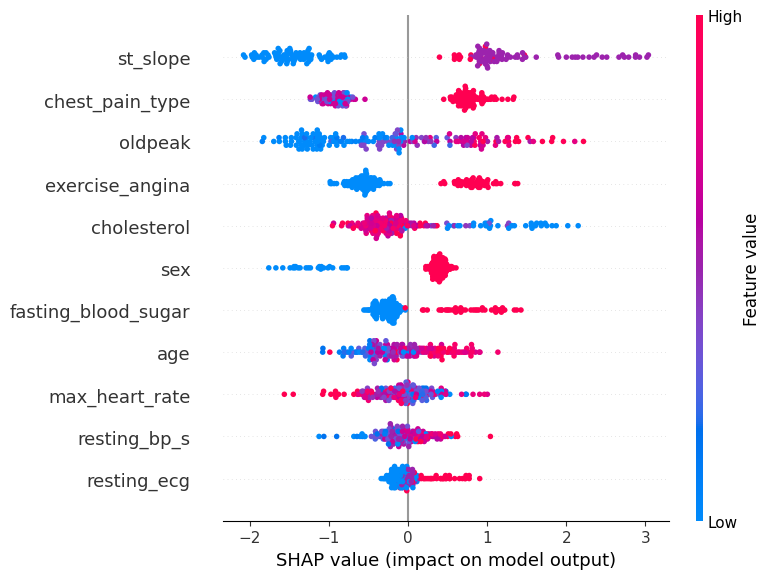

In [17]:
from ARISA_DSML.config import MODEL_NAME
client = MlflowClient(mlflow.get_tracking_uri())
model_info = get_model_by_alias(client, alias="champion")
if model_info is None:
    print("No champion model, predicting using newest model")
    model_info = client.get_latest_versions(MODEL_NAME)[0]

# extract params/metrics data for run `test_run_id` in a single dict 
run_data_dict = client.get_run(model_info.run_id).data.to_dictionary()
run = client.get_run(model_info.run_id)
log_model_meta = json.loads(run.data.tags['mlflow.log-model.history'])
log_model_meta[0]['signature']


_, artifact_folder = os.path.split(model_info.source)
model_uri = "runs:/{}/{}".format(model_info.run_id, artifact_folder)
print(model_uri)
loaded_model = mlflow.catboost.load_model(model_uri)

params = run_data_dict["params"]
params["feature_columns"] = [inp["name"] for inp in json.loads(log_model_meta[0]['signature']['inputs'])]
preds_path = predict(loaded_model, df_test, params)